In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
main_df = pd.read_csv('report.csv', index_col = 0, parse_dates=['DateTime'])

main_df.head()

,DateTime,Junction,Vehicles,Hour,DayOfWeek,Month,IsWeekend,tempC,precipMM,humidity,windspeedKmph,Event_Name,Event_Type
0,2015-11-01 00:00:00,1,15,0,6,11,True,20,0.0,93,8,No events,No events
1,2015-11-01 00:00:00,2,6,0,6,11,True,20,0.0,93,8,No events,No events
2,2015-11-01 00:00:00,3,9,0,6,11,True,20,0.0,93,8,No events,No events
3,2015-11-01 00:00:00,4,0,0,6,11,True,20,0.0,93,8,No events,No events
4,2015-11-01 01:00:00,1,13,1,6,11,True,20,0.0,94,8,No events,No events


In [4]:
junc = 1
df = main_df[main_df.Junction == junc]
df

,DateTime,Junction,Vehicles,Hour,DayOfWeek,Month,IsWeekend,tempC,precipMM,humidity,windspeedKmph,Event_Name,Event_Type
0,2015-11-01 00:00:00,1,15,0,6,11,True,20,0.0,93,8,No events,No events
4,2015-11-01 01:00:00,1,13,1,6,11,True,20,0.0,94,8,No events,No events
8,2015-11-01 02:00:00,1,10,2,6,11,True,20,0.0,95,7,No events,No events
12,2015-11-01 03:00:00,1,7,3,6,11,True,19,0.0,97,6,No events,No events
16,2015-11-01 04:00:00,1,9,4,6,11,True,21,0.0,90,9,No events,No events
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58348,2017-06-30 19:00:00,1,105,19,4,6,False,23,0.2,72,18,No events,No events
58352,2017-06-30 20:00:00,1,96,20,4,6,False,23,0.0,74,17,No events,No events
58356,2017-06-30 21:00:00,1,90,21,4,6,False,22,0.0,77,17,No events,No events
58360,2017-06-30 22:00:00,1,84,22,4,6,False,22,0.0,78,18,No events,No events


In [5]:
if junc == 4:
    df = df[df.DateTime >= pd.to_datetime('2017-01-01')]

In [6]:
# Average vehicle count per hour
avg_vehicles_per_hour = df.groupby('Hour')['Vehicles'].mean().reset_index()
avg_vehicles_per_hour.columns = ['Hour', 'Average_Vehicles']

In [7]:
# Average vehicle count per day of week
avg_vehicles_per_day = df.groupby('DayOfWeek')['Vehicles'].mean().reset_index()
avg_vehicles_per_day.columns = ['DayOfWeek', 'Average_Vehicles']


In [8]:
# Extract week of year
df['WeekOfYear'] = df['DateTime'].dt.isocalendar().week

# Average vehicle count per week of the year
avg_vehicles_per_week = df.groupby('WeekOfYear')['Vehicles'].mean().reset_index()
avg_vehicles_per_week.columns = ['WeekOfYear', 'Average_Vehicles']

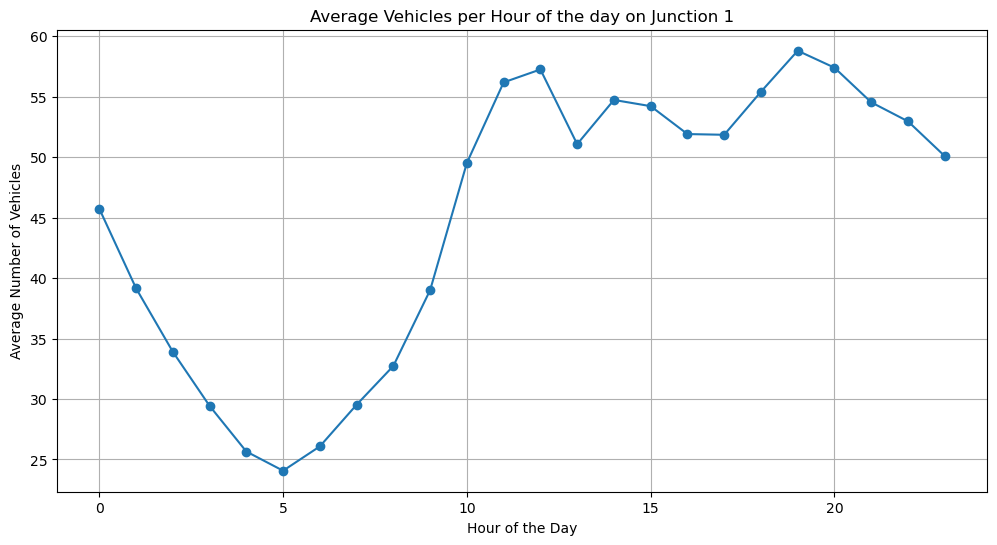

Peak Hours:
     Hour  Average_Vehicles
19    19         58.804276
20    20         57.401316
12    12         57.254934
11    11         56.187500
18    18         55.411184


In [9]:
# Plot average vehicles per hour
plt.figure(figsize=(12, 6))
plt.plot(avg_vehicles_per_hour['Hour'], avg_vehicles_per_hour['Average_Vehicles'], marker='o')
plt.title(f'Average Vehicles per Hour of the day on Junction {junc}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Vehicles')
plt.grid(True)
plt.savefig(f'Average Vehicles per Hour of the day on Junction {junc}.png')
plt.show()

# Identify peak hours
peak_hours = avg_vehicles_per_hour.sort_values(by='Average_Vehicles', ascending=False).head()
print("Peak Hours:\n", peak_hours)

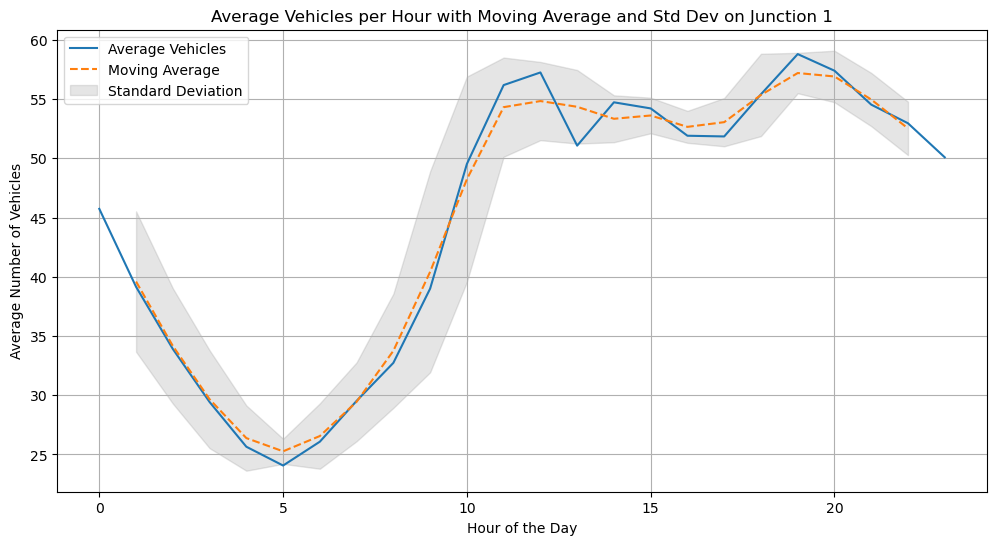

In [10]:
# Calculate moving average and standard deviation
avg_vehicles_per_hour['Moving_Avg'] = avg_vehicles_per_hour['Average_Vehicles'].rolling(window=3, center=True).mean()
avg_vehicles_per_hour['Std_Dev'] = avg_vehicles_per_hour['Average_Vehicles'].rolling(window=3, center=True).std()

# Plot with moving average and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(avg_vehicles_per_hour['Hour'], avg_vehicles_per_hour['Average_Vehicles'], label='Average Vehicles')
plt.plot(avg_vehicles_per_hour['Hour'], avg_vehicles_per_hour['Moving_Avg'], label='Moving Average', linestyle='--')
plt.fill_between(avg_vehicles_per_hour['Hour'], avg_vehicles_per_hour['Moving_Avg'] - avg_vehicles_per_hour['Std_Dev'], 
                 avg_vehicles_per_hour['Moving_Avg'] + avg_vehicles_per_hour['Std_Dev'], color='gray', alpha=0.2, label='Standard Deviation')
plt.title(f'Average Vehicles per Hour with Moving Average and Std Dev on Junction {junc}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Vehicles')
plt.legend()
plt.grid(True)
plt.savefig(f'Average Vehicles per Hour with Moving Average and Std Dev on Junction {junc}.png')
plt.show()


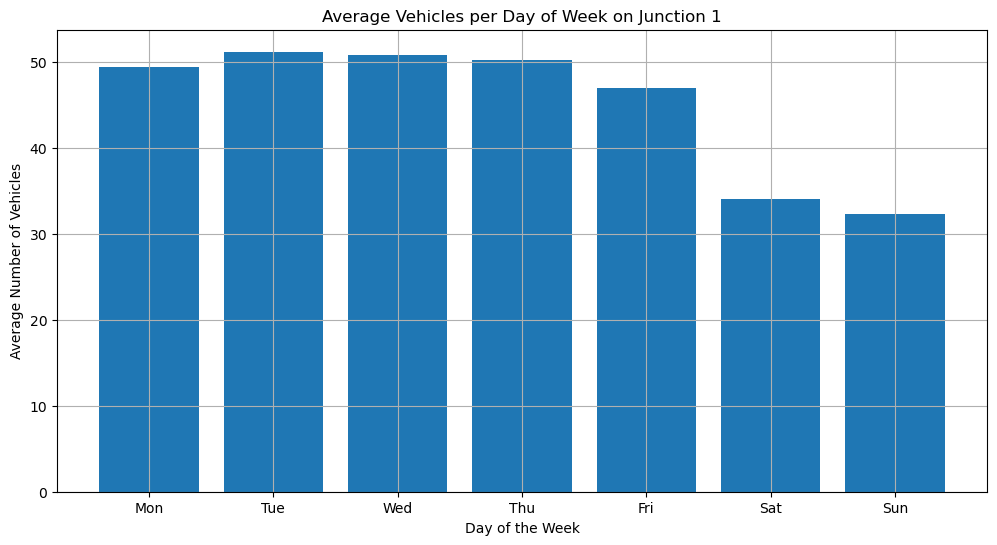

In [11]:
# Plot average vehicles per day of week
plt.figure(figsize=(12, 6))
plt.bar(avg_vehicles_per_day['DayOfWeek'], avg_vehicles_per_day['Average_Vehicles'])
plt.title(f'Average Vehicles per Day of Week on Junction {junc}')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.savefig(f'Average Vehicles per Day of Week on Junction {junc}.png')

plt.show()


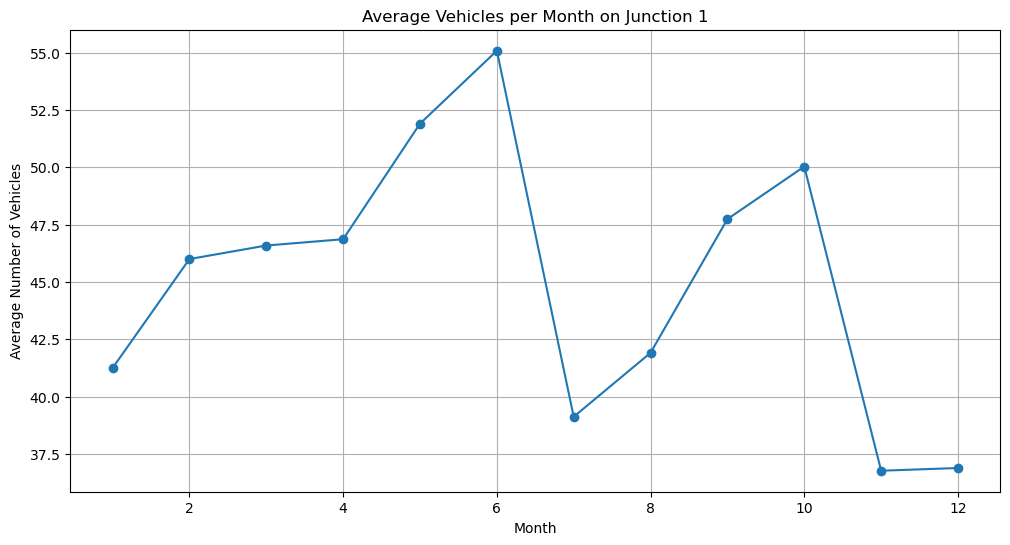

In [12]:
# Extract month
df['Month'] = df['DateTime'].dt.month

# Average vehicle count per month
avg_vehicles_per_month = df.groupby('Month')['Vehicles'].mean().reset_index()
avg_vehicles_per_month.columns = ['Month', 'Average_Vehicles']

# Plot average vehicles per month
plt.figure(figsize=(12, 6))
plt.plot(avg_vehicles_per_month['Month'], avg_vehicles_per_month['Average_Vehicles'], marker='o')
plt.title(f'Average Vehicles per Month on Junction {junc}')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')
plt.grid(True)
plt.savefig(f'Average Vehicles per Month on Junction {junc}.png')

plt.show()


In [13]:
correlation = df[['Vehicles', 'tempC',	'precipMM', 'humidity',	'windspeedKmph']].corr()
correlation

,Vehicles,tempC,precipMM,humidity,windspeedKmph
Vehicles,1.000000,0.184461,0.090581,-0.200734,0.019403
tempC,0.184461,1.000000,-0.005774,-0.765461,0.021787
precipMM,0.090581,-0.005774,1.000000,0.102771,0.048232
humidity,-0.200734,-0.765461,0.102771,1.000000,0.113696
windspeedKmph,0.019403,0.021787,0.048232,0.113696,1.000000


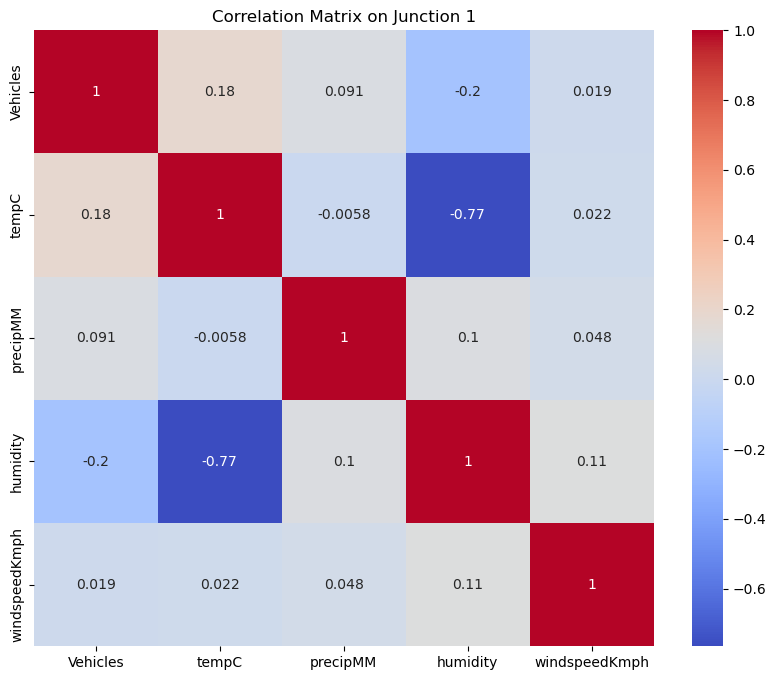

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix on Junction {junc}')
plt.savefig(f'Correlation Matrix on Junction {junc}.png')

plt.show()

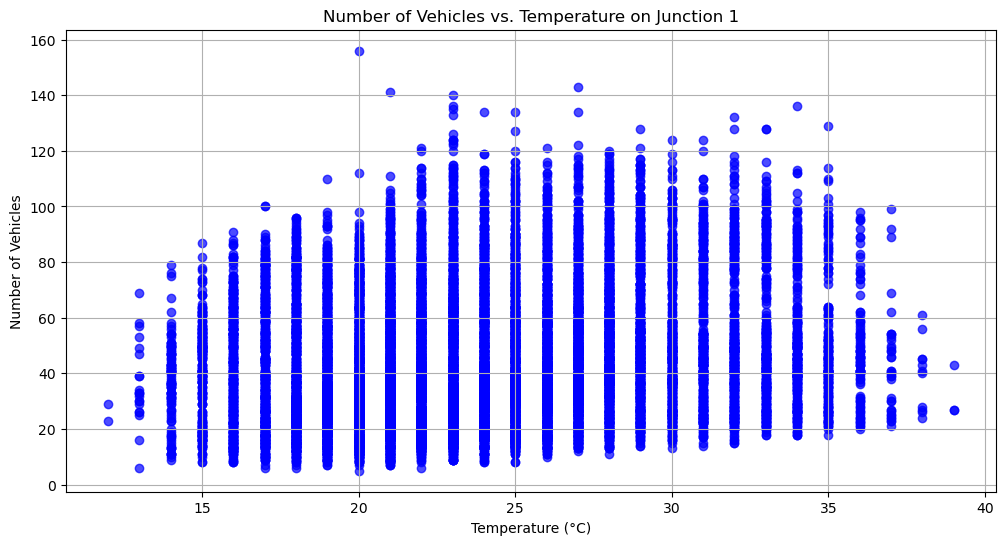

In [15]:
# Scatter plot of Vehicles vs. Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df['tempC'], df['Vehicles'], color='blue', alpha=0.7)
plt.title(f'Number of Vehicles vs. Temperature on Junction {junc}')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.savefig(f'Number of Vehicles vs. Temperature on Junction {junc}.jpeg')
plt.show()


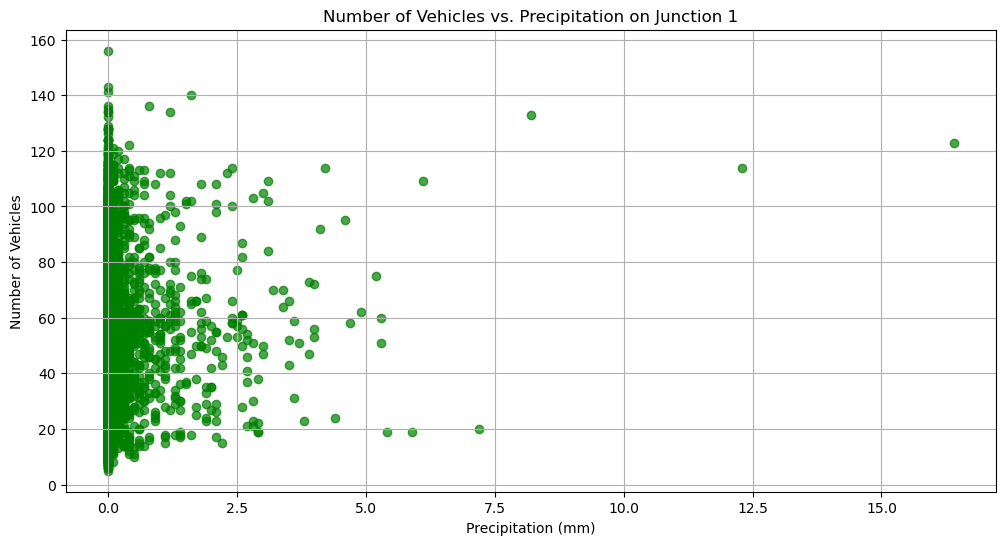

In [16]:
# Scatter plot of Vehicles vs. Precipitation
plt.figure(figsize=(12, 6))
plt.scatter(df['precipMM'], df['Vehicles'], color='green', alpha=0.7)
plt.title(f'Number of Vehicles vs. Precipitation on Junction {junc}')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.savefig(f'Number of Vehicles vs. Precipitation on Junction {junc}.png')

plt.show()
